<a href="https://colab.research.google.com/github/roysayan96/Deep_learning/blob/main/DL_assessment5_Q1_20mai0008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
 # loading data
data = pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Train.csv")      

In [18]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [20]:
Low_data = data.iloc[:,3:4].values

In [21]:
print(Low_data)

[[324.97]
 [329.08]
 [326.89]
 ...
 [783.2 ]
 [778.92]
 [770.41]]


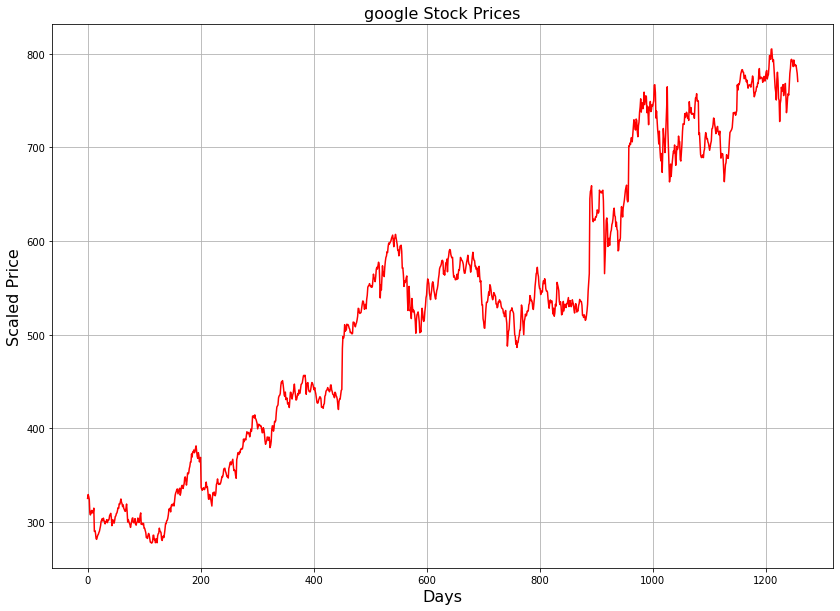

In [22]:
# Visualizing the data
plt.figure(figsize=(14,10))                 
plt.plot(Low_data,c="red")
plt.title("google Stock Prices",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Scaled Price",fontsize=16)
plt.grid()
plt.show()

In [23]:
# Scaling the data between 1 and 0
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
Low_scaled = scaler.fit_transform(Low_data)

In [25]:
print(Low_scaled)

[[0.09044931]
 [0.09823458]
 [0.09408623]
 ...
 [0.95844067]
 [0.95033338]
 [0.93421352]]


In [45]:
step_size = 21       
train_x = []
train_y = []

In [46]:
for i in range(step_size,1257):               
    train_x.append(Low_scaled[i-step_size:i,0])
    train_y.append(Low_scaled[i,0])

In [47]:
train_x = np.array(train_x)                   
train_y = np.array(train_y)

In [48]:
print(train_x.shape)

(1236, 21)


In [49]:
test_x = train_x[800:]             
train_x = train_x[:800]           
test_y = train_y[800:]  
train_y = train_y[:800]

In [52]:
train_x = np.reshape(train_x, (800, step_size, 1))           


In [51]:
test_x.shape

(436, 21)

In [53]:
test_x = np.reshape(test_x, (436, step_size, 1))

In [54]:
print(train_x.shape)


(800, 21, 1)


**Recurrent neural networks (RNN)** are a class of neural networks that are helpful in modeling sequence data. Derived from feedforward networks, RNNs exhibit similar behavior to how human brains function. Recurrent neural networks produce predictive results in sequential data that other algorithms can't.

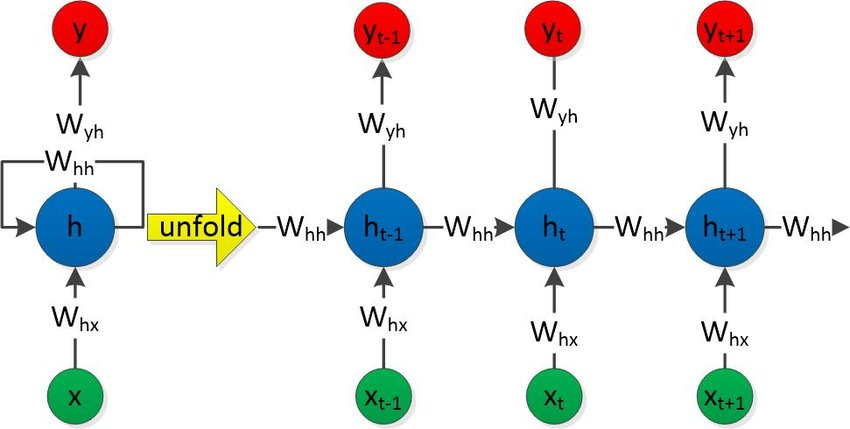

In [55]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

In [56]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 21, 40)            1680      
_________________________________________________________________
dropout (Dropout)            (None, 21, 40)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 21, 40)            3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 40)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 40)                3240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4

In [57]:
rnn_model.compile(optimizer="adam",loss="MSE")

In [58]:
rnn_model.fit(train_x,train_y,epochs=10,batch_size=25)

Epoch 1/10
32/32 [==============================] - 2s 12ms/step - loss: 0.2076
Epoch 2/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0763
Epoch 3/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0443
Epoch 4/10
32/32 [==============================] - 0s 13ms/step - loss: 0.0231
Epoch 5/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 6/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0182
Epoch 7/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0137
Epoch 8/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0123
Epoch 9/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0120
Epoch 10/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0090


In [60]:
rnn_predictions = rnn_model.predict(test_x)

rnn_score = r2_score(test_y,rnn_predictions)

**Long short-term memory (LSTM)** is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems).

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

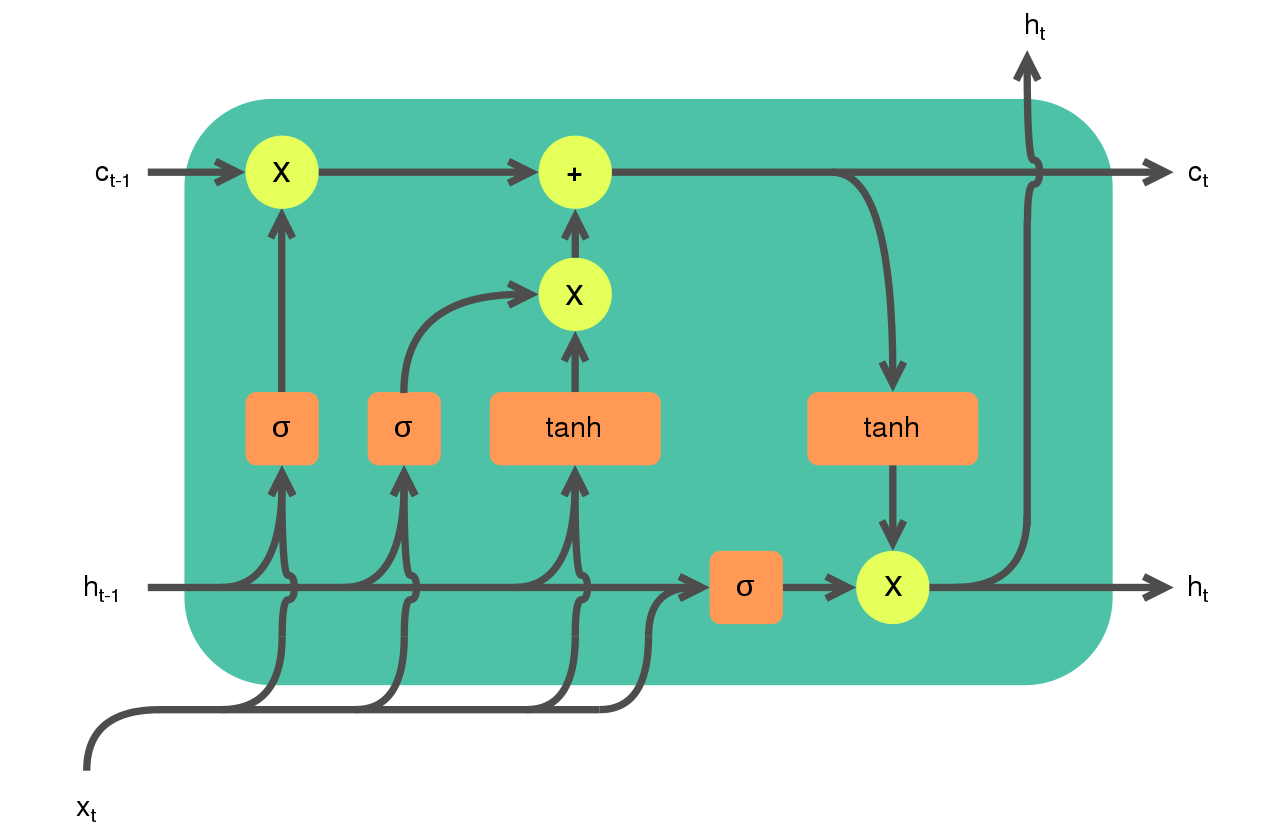

In [61]:
lstm_model = Sequential()
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 40)            6720      
_________________________________________________________________
dropout_3 (Dropout)          (None, 21, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 21, 40)            12960     
_________________________________________________________________
dropout_4 (Dropout)          (None, 21, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [62]:
lstm_model.compile(optimizer="adam",loss="MSE")

In [63]:
lstm_model.fit(train_x,train_y,epochs=10,batch_size=25)

Epoch 1/10
32/32 [==============================] - 4s 21ms/step - loss: 0.0355
Epoch 2/10
32/32 [==============================] - 1s 22ms/step - loss: 0.0033
Epoch 3/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 4/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0024
Epoch 5/10
32/32 [==============================] - 1s 23ms/step - loss: 0.0021
Epoch 6/10
32/32 [==============================] - 1s 22ms/step - loss: 0.0027
Epoch 7/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 8/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0020
Epoch 9/10
32/32 [==============================] - 1s 22ms/step - loss: 0.0021
Epoch 10/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0019


In [64]:
lstm_predictions = lstm_model.predict(test_x)

lstm_score = r2_score(test_y,lstm_predictions)

In [65]:
print("R^2 Score of RNN",rnn_score)
print("R^2 Score of LSTM",lstm_score)

R^2 Score of RNN 0.7780026925088628
R^2 Score of LSTM 0.6828495980440172


In [66]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

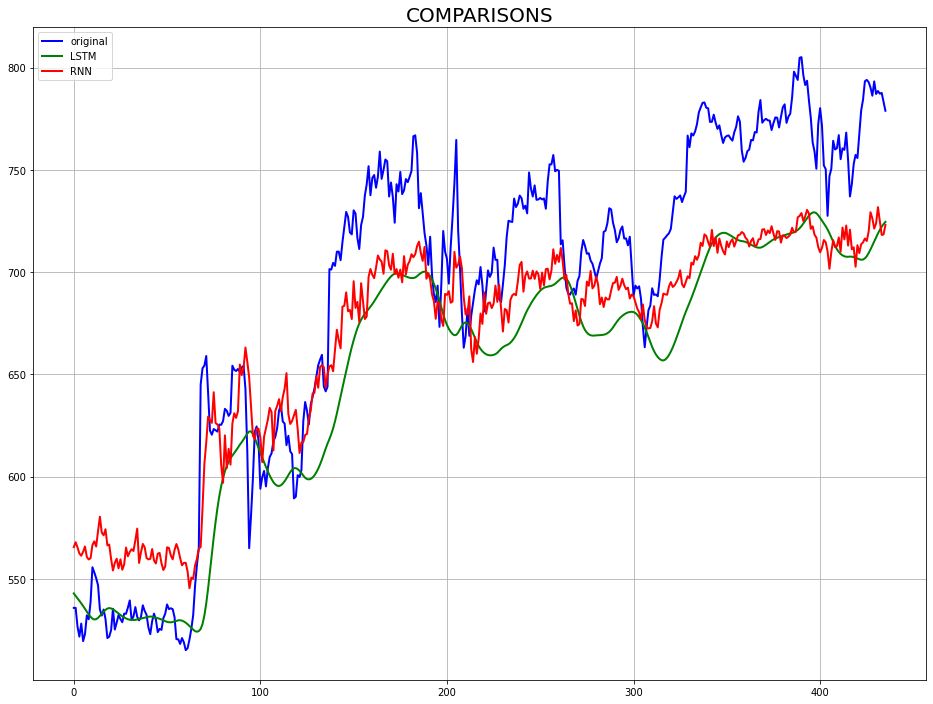

In [67]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("COMPARISONS",fontsize=20)
plt.grid()
plt.show()